Just taking a quick look at the V471 tau light curve. Lightkurve only found the long cadence data, trying again with short cadence

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [5]:
# star= lk.search.search_lightcurvefile('V471 Tau', mission='K2')

In [6]:
# star.download(download_dir='/media/david/5tb_storage1/cc_cet/misc/')

KeplerLightCurveFile(ID: 210619926)

In [3]:
hdul = fits.open('/media/david/5tb_storage1/v471_tau/k2/MAST_2021-02-04T2322/K2/ktwo210619926-c04_sc/ktwo210619926-c04_slc.fits')

In [4]:
hdul[1].data.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

In [5]:
data = hdul[1].data

(2230.0, 2235.0)

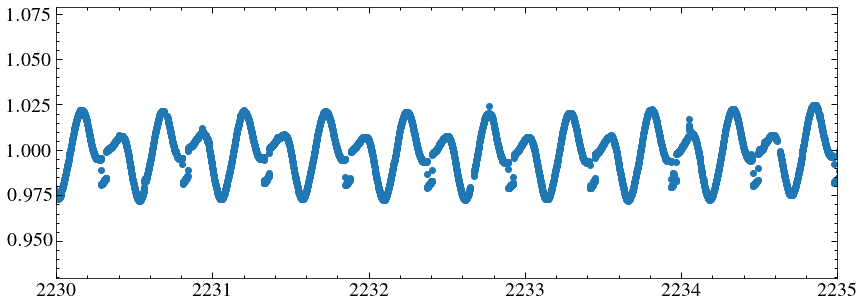

In [23]:
t, f, e, q, bk = data['TIME'], data['SAP_FLUX'], data['SAP_FLUX_ERR'], data['SAP_QUALITY'], data['SAP_BKG']#[np.isnan(data['SAP_BKG'])==False]
t, f, e, bk = t[q==0], f[q==0], e[q==0], bk[q==0]
#fit = np.polyval((np.polyfit(t,f,2)), t)
#f = (f/fit)-1
#e = (e/fit)
#cut_mask = (bk < 1.1*np.median(bk))
lc = lk.LightCurve(time=t, flux=f, flux_err=e ).remove_nans().flatten(3001)
plt.scatter(lc.time, lc.flux)
plt.xlim(2230, 2235)

6.253452935529456 h


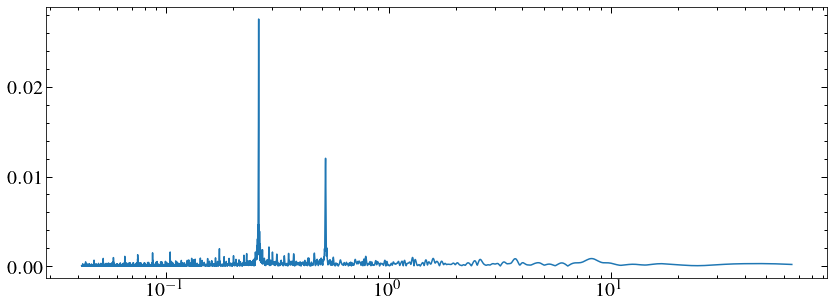

In [18]:
pg = lc.to_periodogram(oversample_factor=10,minimum_period=60*u.minute, maximum_period=65*u.day)
plt.plot(pg.period, pg.power)
plt.xscale('log')
print(pg.period_at_max_power.to(u.h))

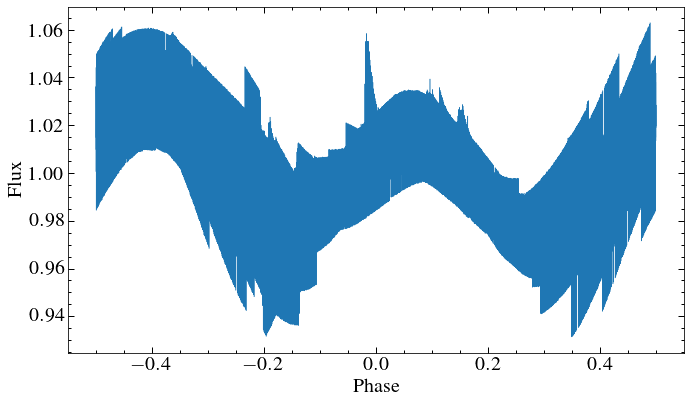

In [20]:
lcf=lc.fold(pg.period_at_max_power*2)#.plot()
plt.figure(figsize=(10,6))
plt.plot(lcf.time, lcf.flux, lw=0.5)#, yerr=lcf.flux_err, ls='none', marker='o')
plt.xlabel('Phase')
plt.ylabel('Flux')
plt.tight_layout()
plt.show()
#lcf.plot()

Ok...it's messy if you analise it out of a few day chunks. Fortunatly, https://iopscience.iop.org/article/10.3847/2515-5172/aae36f have done the hard work for me! Might need to use the period from the STIS paper for the STIS data as that's closer in time frame.

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 3470 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        